In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import generate_figure, test_partial
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

2022-03-29 23:38:35.562888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 23:38:35.562923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
data1 = np.loadtxt("../data/UnionCom/scGEM/GeneExpression.txt")
data2 = np.loadtxt("../data/UnionCom/scGEM/DNAmethylation.txt")
type1 = np.loadtxt("../data/UnionCom/scGEM/type1.txt")
type2 = np.loadtxt("../data/UnionCom/scGEM/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)

# Sampling
# idx = np.random.choice(range(data1.shape[0]), 50, replace=False)
# data1, data2, type1, type2 = (x[idx] for x in (data1, data2, type1, type2))

# Labels
type_func = lambda x: {1:'BJ', 2:'d8', 3:'d16T+', 4:'d24T+', 5:'IPS'}[x]
labels = [np.array([type_func(j) for j in i]) for i in (type1,type2)]

# Preprocessing
data1 = preprocessing.scale(data1, axis=0)
data2 = preprocessing.scale(data2, axis=0)
dataset = [data1, data2]

# Utility
positivize = lambda X: [(1 + preprocessing.scale(1 + x)) / 2 for x in X]

In [ ]:
# Vars
reduced_dim = 2

# ComManDo

In [4]:
cm = ComManDo(output_dim=reduced_dim, epoch_DNN=2000, log_DNN=500)
cm_data = cm.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.9016 alpha:3.3532
epoch:[1000/2000] err:0.8065 alpha:3.4468
epoch:[1500/2000] err:0.7737 alpha:3.4895
epoch:[2000/2000] err:0.7415 alpha:3.5167
Finished Matching!
---------------------------------
Performing NLMA
epoch:[500/2000]: loss:0.646822
epoch:[1000/2000]: loss:0.558798
epoch:[1500/2000]: loss:0.596996
epoch:[2000/2000]: loss:0.539237
Finished Mapping!
Setup: 0.006069202999995582
Get subset samples: 0.00027583729300005897
Run model: 0.0012317380449998012
Reconstruction loss: 5.444721599998559e-05
Difference calculation: 0.000520655863999977
Aligned loss: 3.735127499998469e-05
F-cross loss: 1.2212947500067628e-05
F-inv-cross loss: 1.2958165999890525e-05
Step: 0.002687245705499997
Output: 0.002910591999992107
Total: 0.013812241511987452
---------------------------------
ComManDo Don

# UnionCom

In [5]:
uc = ComManDo(project_mode='tsne', output_dim=reduced_dim)
uc_data = uc.fit_transform(dataset=positivize(dataset))

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.9020 alpha:3.3540
epoch:[1000/2000] err:0.8068 alpha:3.4477
epoch:[1500/2000] err:0.7740 alpha:3.4904
epoch:[2000/2000] err:0.7421 alpha:3.5177
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[10/100]: loss:3.386747, align_loss:0.236918
epoch:[20/100]: loss:3.297717, align_loss:0.190269
epoch:[30/100]: loss:3.234715, align_loss:0.172852
epoch:[40/100]: loss:3.270508, align_loss:0.121444
epoch:[50/100]: loss:3.107198, align_loss:0.031005
epoch:[60/100]: loss:2.950167, align_loss:0.023899
epoch:[70/100]: loss:2.781241, align_loss:0.028117
epoch:[80/100]: loss:2.905008, align_loss:0.030764
epoch:[90/100]: loss:2.821410, align_loss:0.031556
epoch:[100/100]: loss:2.795603, align_loss:0.035382
Done
---------------------------------
ComManDo Done!
Dis

# Nonlinear Manifold Alignment

In [6]:
nl_data, _ = mmd_combine(*dataset, method='maninetcluster', alignment='nonlinear manifold aln', num_dims=reduced_dim)

# Figure Generation

In [29]:
priors = np.zeros((len(dataset[0]), len(dataset[0])))
cm_data_none = ComManDo(output_dim=reduced_dim, epoch_DNN=2000, log_DNN=500, P=priors).fit_transform(dataset=dataset)

random_idx = np.random.choice(range(len(dataset[0])), int(.5 * len(dataset[0])), replace=False)
priors = np.zeros(len(dataset[0]))
priors[random_idx] = 1
priors = np.diag(priors)
cm_data_half = ComManDo(output_dim=reduced_dim, epoch_DNN=2000, log_DNN=500, P=priors).fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.9016 alpha:3.3532
epoch:[1000/2000] err:0.8065 alpha:3.4468
epoch:[1500/2000] err:0.7737 alpha:3.4895
epoch:[2000/2000] err:0.7415 alpha:3.5167
Finished Matching!
---------------------------------
Performing NLMA
epoch:[500/2000]: loss:0.596853
epoch:[1000/2000]: loss:0.476502
epoch:[1500/2000]: loss:0.482573
epoch:[2000/2000]: loss:0.470580
Finished Mapping!
Setup: 0.002311715999894659
Get subset samples: 0.00029577931899802936
Run model: 0.0012319985970009385
Reconstruction loss: 5.458497000108764e-05
Difference calculation: 0.0005455642185009992
F-cross loss: 3.463854549681855e-05
F-inv-cross loss: 1.3346050000222931e-05
Step: 0.002690553211499491
Output: 0.0013181489998714824
Total: 0.008496329911263728
---------------------------------
ComManDo Done!
Distance: 0.0271680439998363
Cor

/home/thema/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:290: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= np.linalg.norm(y)
/home/thema/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:290: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= np.linalg.norm(y)


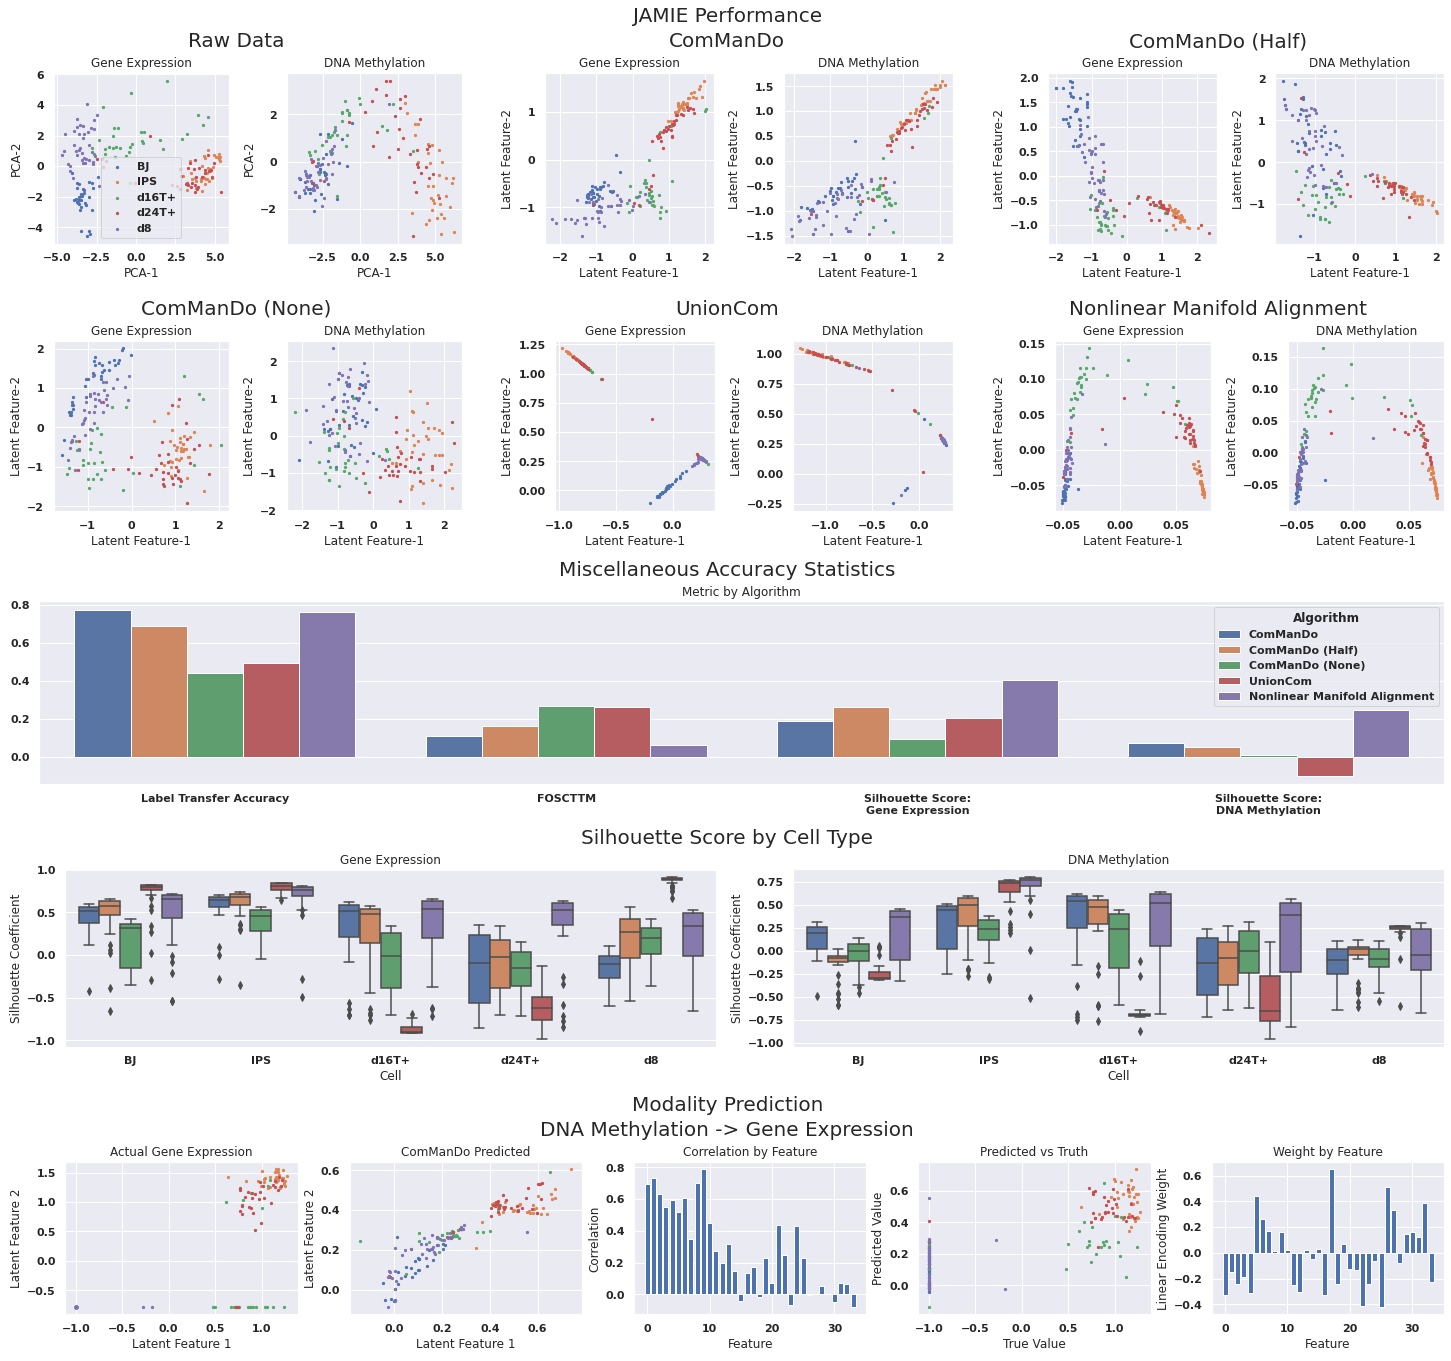

In [41]:
#%%capture --no-display
params = {
    'dataset_names': ['Gene Expression', 'DNA Methylation'],
    'alg_results': [cm_data_half, cm_data_none, uc_data, nl_data],
    'alg_names': ['ComManDo (Half)', 'ComManDo (None)', 'UnionCom', 'Nonlinear Manifold Alignment'],
    'scale': 20,
    'reconstruction_features': {(1, 0): [9, 1]},
    'exclude_predict': [(0, 1)],
    'skip_partial': True,
    'skip_nn': True,
    # 'skip_simple': True,
}
generate_figure(cm, cm_data, dataset, labels, **params)